In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [12]:
#Reading data
data = pd.read_csv('Data_cleaned.csv')

In [13]:
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,max_salary,avg_salary,company_name,company_age,python,SQL,excel,tableau,Post,Seniority
0,Data Scientist 1,₹413K - ₹760K (Glassdoor Est.),Specific responsibilities include:\nProvide an...,4.1,Paypal\n4.1,Bangalore,10000+ Employees,1998,Company - Public,Internet,...,760,586.5,Paypal\n,23,1,1,1,0,Data Scientist,Other
1,Data Scientist,₹540K - ₹724K (Glassdoor Est.),"At PayPal, were literally reinventing how the ...",4.1,Paypal\n4.1,Chennai,10000+ Employees,1998,Company - Public,Internet,...,724,632.0,Paypal\n,23,1,1,0,0,Data Scientist,Other
2,Data Scientist,₹496K - ₹873K (Glassdoor Est.),Back\nData Scientist\n\nCAROUSEL_PARAGRAPH\nHy...,4.1,Appirio\n4.1,Hyderābād,1001 to 5000 Employees,2006,Company - Private,Consulting,...,873,684.5,Appirio\n,15,0,0,0,0,Data Scientist,Other
3,Data Scientist,₹596K - ₹751K (Glassdoor Est.),5+ years of experience\nWork with stakeholders...,4.2,Schneider Electric\n4.2,Bangalore,10000+ Employees,1836,Company - Public,Energy,...,751,673.5,Schneider Electric\n,185,1,1,1,0,Data Scientist,Other
4,Data Scientist,₹439K - ₹561K (Glassdoor Est.),Our Excellerate Global Leadership Program will...,4.0,Ericsson-Worldwide\n4.0,Chennai,10000+ Employees,1876,Company - Public,Telecommunications Service,...,561,500.0,Ericsson-Worldwide\n,145,1,0,1,0,Data Scientist,Other


<AxesSubplot:xlabel='Rating', ylabel='Count'>

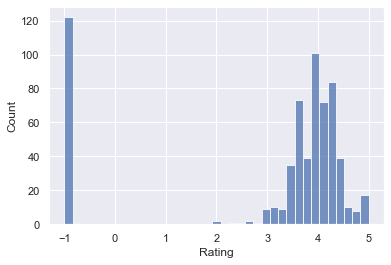

In [15]:
# Plotting ratings
sns.histplot(data['Rating'])

In [89]:
# There are many missing values for rating. Replacing these values by mean rating
r = data.loc[data['Rating'] != -1]
r['Rating'].mean()

3.969005847953218

In [93]:
data['Rating']=data['Rating'].replace(to_replace=-1,value=r['Rating'].mean())

<AxesSubplot:xlabel='Rating', ylabel='Count'>

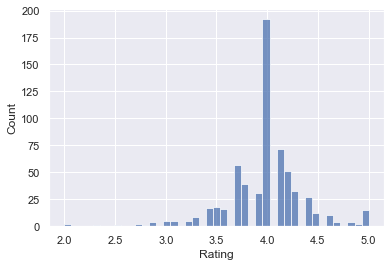

In [94]:
sns.histplot(data['Rating'])

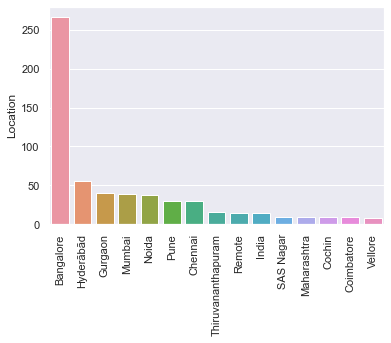

In [30]:
# Most jobs are offered in Bangalore which isn't any surprise

loc = data['Location'].value_counts()[:15]
chart = sns.barplot(x=loc.index,y=loc)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

In [25]:
data['Type of ownership'].value_counts()

Company - Private                 296
Company - Public                  215
-1                                 97
Contract                            8
Subsidiary or Business Segment      6
Private Practice / Firm             4
Self-employed                       4
Unknown                             3
Non-profit Organisation             1
Government                          1
Name: Type of ownership, dtype: int64

In [26]:
data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'min_salary', 'max_salary',
       'avg_salary', 'company_name', 'company_age', 'python', 'SQL', 'excel',
       'tableau', 'Post', 'Seniority'],
      dtype='object')

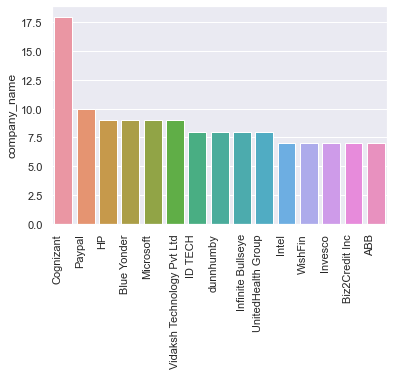

In [32]:
# Most job openings are in Cognizant

comp = data['company_name'].value_counts()[:15]
chart = sns.barplot(x=comp.index,y=comp)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

<AxesSubplot:xlabel='Post', ylabel='Count'>

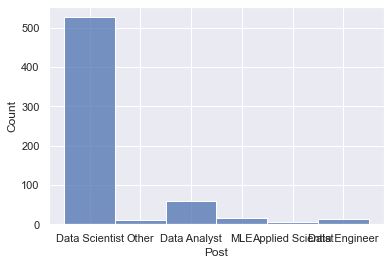

In [37]:
# Most jobs are offered for the role of Data Scientist

sns.histplot(data['Post'])

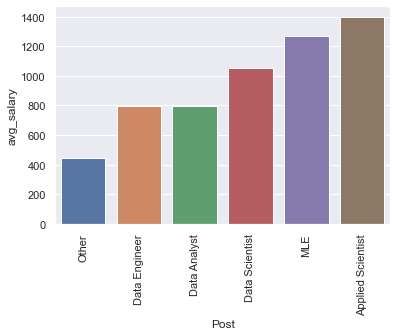

In [74]:
# Average salaries for different posts accross the country

a=pd.pivot_table(data, index='Post', values = 'avg_salary').sort_values(by = 'avg_salary')
chart = sns.barplot(x=a.index,y=a['avg_salary'])
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

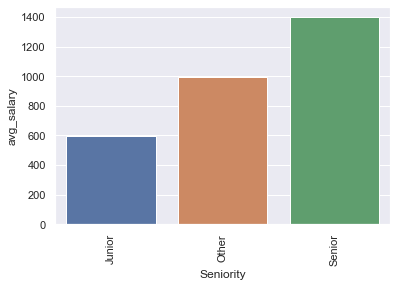

In [72]:
# This is quite obvious that people with more experience are offered more than people woth less experience

b = pd.pivot_table(data, index='Seniority', values = 'avg_salary').sort_values(by = 'avg_salary')
chart = sns.barplot(x=b.index,y=b['avg_salary'])
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

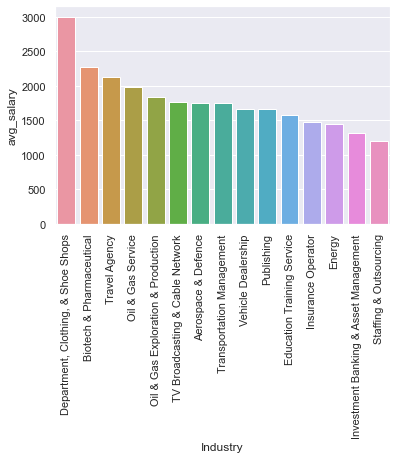

In [76]:
# Clothing, Biotech, Travel are the 3 industries which are providing average salary of above 20 lakhs per annum.
# This could be possible because they are recruiting experienced people.

c = pd.pivot_table(data, index='Industry', values = 'avg_salary').sort_values(by = 'avg_salary',ascending=False)[:15]
chart = sns.barplot(x=c.index,y=c['avg_salary'])
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

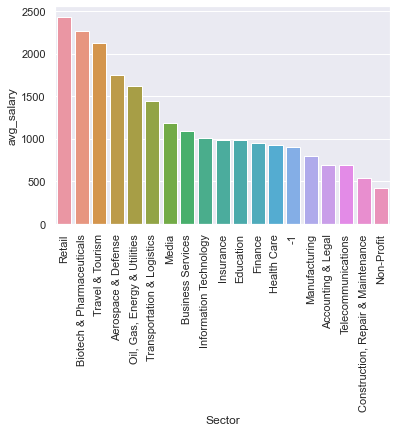

In [81]:
# Retail sector provides highest average salary while non-profit provides the least as expected

d = pd.pivot_table(data, index='Sector', values = 'avg_salary').sort_values(by = 'avg_salary',ascending=False)[:20]
chart = sns.barplot(x=d.index,y=d['avg_salary'])
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

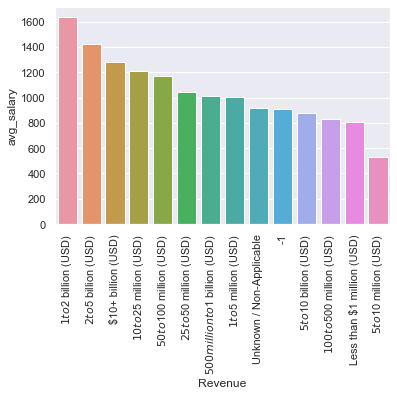

In [82]:
# Companies whose revenus is in Billion USD are expected to provide high salaries, which is the case

e = pd.pivot_table(data, index='Revenue', values = 'avg_salary').sort_values(by = 'avg_salary',ascending=False)[:20]
chart = sns.barplot(x=e.index,y=e['avg_salary'])
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

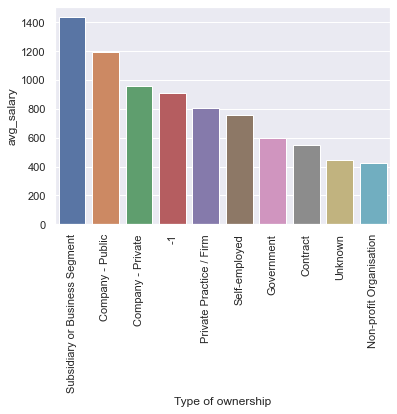

In [85]:
# Again non profit orgs are the ones providing least avg salary

f = pd.pivot_table(data, index='Type of ownership', values = 'avg_salary').sort_values(by = 'avg_salary',ascending=False)[:20]
chart = sns.barplot(x=f.index,y=f['avg_salary'])
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

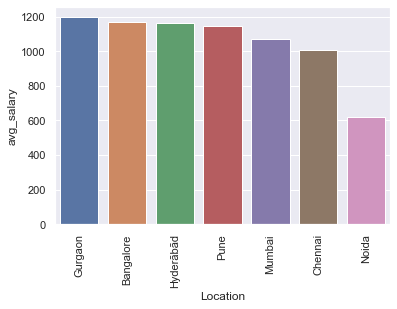

In [140]:
# This is city wise distribution of average salary. We would expect Bangalore to be on top but here it is Gurgaon
# This is because in our data most of the job positions are offered in Bangalore hence it covers all types of 
# copanies and posts. Still average salary for top 5 cities is very similar.

data_city_bangalore = data.loc[data['Location'] == 'Bangalore']
data_city_hyderabad = data.loc[data['Location'] == 'Hyderābād']
data_city_gurgaon   = data.loc[data['Location'] == 'Gurgaon']
data_city_mumbai    = data.loc[data['Location'] == 'Mumbai']
data_city_noida     = data.loc[data['Location'] == 'Noida']
data_city_pune      = data.loc[data['Location'] == 'Pune']
data_city_chennai   = data.loc[data['Location'] == 'Chennai']

data_city = pd.concat([data_city_bangalore,data_city_hyderabad,data_city_gurgaon ,data_city_mumbai ,data_city_noida    
                      ,data_city_pune ,data_city_chennai  ])

g = pd.pivot_table(data_city, index='Location', values = 'avg_salary').sort_values(by='avg_salary',ascending=False)
chart = sns.barplot(x=g.index,y=g['avg_salary'])
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()